**Partie III – Application du Machine Learning pour la fonction d’évaluation**

Génère 500 positions gagnantes et 500 positions perdantes pour le joueur blanc.

data set : 80%
test set : 20%

1) Entrainer deux modeles et comparer la qualite de prediction.

In [20]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [15]:
def check_victory(board):
    """Vérifie si le joueur 1 ou -1 a gagné."""
    for i in range(3):
        if np.all(board[i, :] == 1) or np.all(board[:, i] == 1):
            return 1
        if np.all(board[i, :] == -1) or np.all(board[:, i] == -1):
            return -1
    if np.all(np.diag(board) == 1) or np.all(np.diag(np.fliplr(board)) == 1):
        return 1
    if np.all(np.diag(board) == -1) or np.all(np.diag(np.fliplr(board)) == -1):
        return -1
    return 0

def generate_random_board():
    """Génère un plateau 3x3 valide avec exactement 3 pièces par joueur."""
    board = np.zeros((3, 3), dtype=int)
    positions = random.sample(range(9), 6)
    for i in range(3):
        board[positions[i] // 3, positions[i] % 3] = 1
    for i in range(3, 6):
        board[positions[i] // 3, positions[i] % 3] = -1
    return board

def generate_dataset():
    """Génère 500 positions gagnantes et 500 positions perdantes pour le joueur 1."""
    X, y = [], []
    win_count, lose_count = 0, 0
    while win_count < 500 or lose_count < 500:
        board = generate_random_board()
        result = check_victory(board)
        if result == 1 and win_count < 500:
            X.append(board.flatten())
            y.append(1)
            win_count += 1
        elif result == -1 and lose_count < 500:
            X.append(board.flatten())
            y.append(-1)
            lose_count += 1
    return np.array(X), np.array(y)

# Générer le dataset
X, y = generate_dataset()
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 9)
Shape of y: (1000,)


In [16]:
#Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (800, 9) (800,)
Test set: (200, 9) (200,)


In [17]:
# Forêt aléatoire
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test)

# Évaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        93

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[107   0]
 [  0  93]]


In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Choisir k=5
knn.fit(X_train, y_train)

# Prédictions
y_pred_knn = knn.predict(X_test)

# Évaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      1.00       107
           1       0.99      1.00      0.99        93

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Confusion Matrix:
 [[106   1]
 [  0  93]]


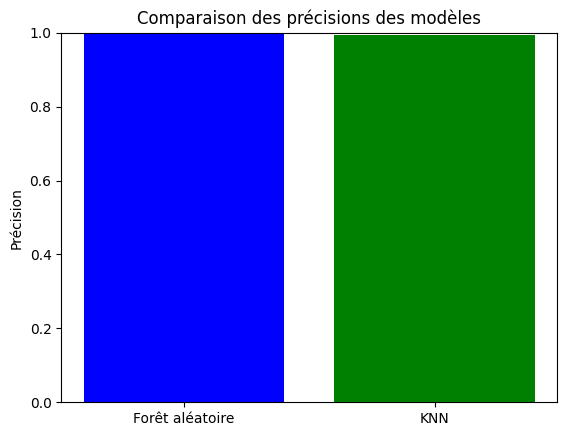

In [19]:
accuracies = {
    "Forêt aléatoire": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn)
}
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green'])
plt.title("Comparaison des précisions des modèles")
plt.ylabel("Précision")
plt.ylim(0, 1)
plt.show()

2) Proposition pour ameliorer plus la qualite des models pour detecter efficacement les positions "presque gagnees" ou "presque perdus"

Combiner l'entraînement d'un modèle de machine learning avec l'algorithme Minimax et l'élagage Alpha-Bêta pour tirer parti à la fois de la puissance de prédiction des modèles de machine learning et de la capacité de recherche arborescente